In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_excel('Wholesale customers data.xlsx')

##### Exploratory Data Analysis

In [7]:
df.shape

(440, 8)

In [8]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [10]:
df.isna().sum()
#There are not null values to handle

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

##### Since all are numerical columns lets plot a distribution plot to look at the data distribution

In [11]:
cat_cols = df[['Region','Channel']]

In [12]:
num_cols = df[[col for col in df.columns if col not in cat_cols.columns]]

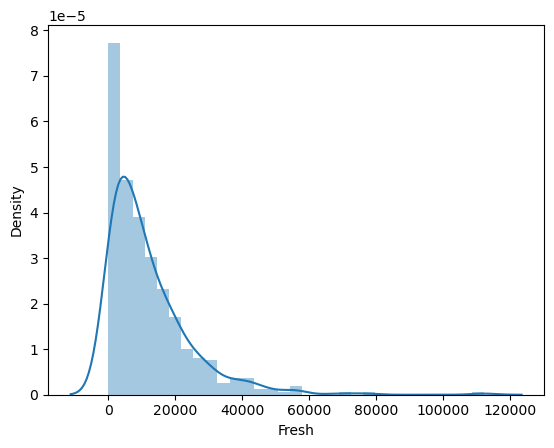

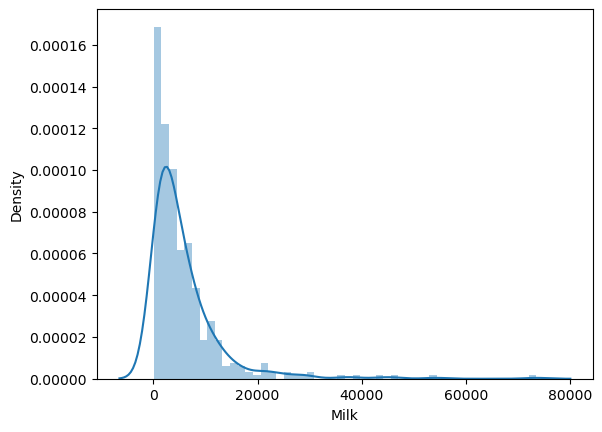

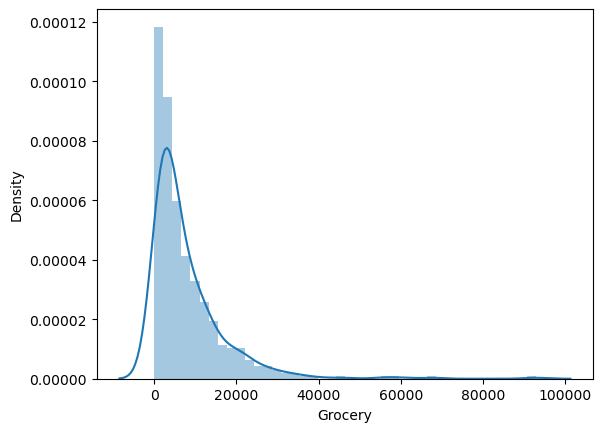

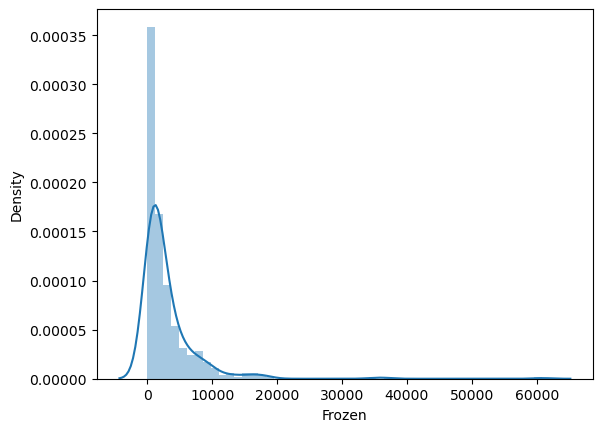

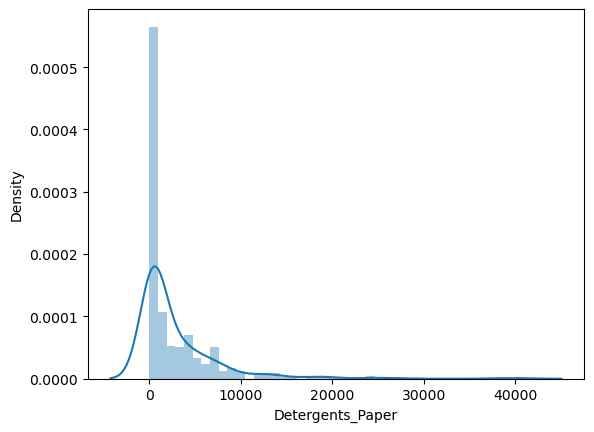

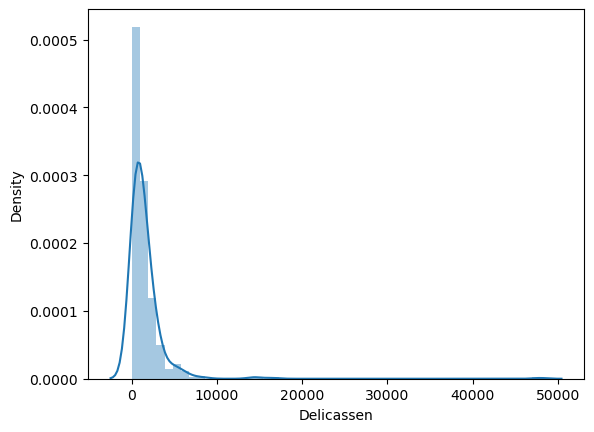

In [13]:
for cols in num_cols:
    sns.distplot(df[cols])
    plt.show()

In [14]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


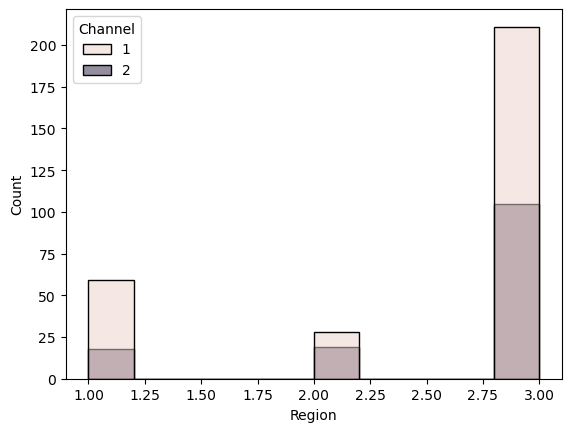

In [15]:
sns.histplot(data = df, x = 'Region', hue = 'Channel')
plt.show()

In [53]:
# for cols in df.columns:
#     plt.figure(figsize = (4,3))
#     sns.boxplot(df[cols])
#     plt.show()

### Scaling Data

##### using Standard Scaler

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [19]:
scaled_df = pd.DataFrame(scaled_df,columns = df.columns)

In [20]:
scaled_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


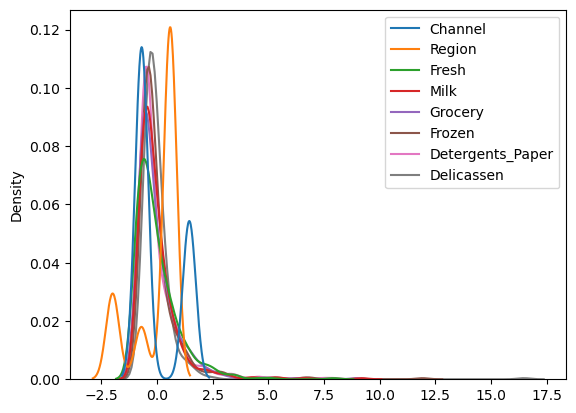

In [21]:
sns.kdeplot(data = scaled_df)
plt.show()

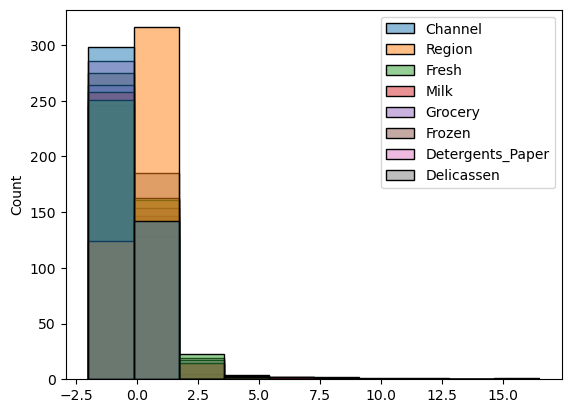

In [22]:
sns.histplot(data = scaled_df, bins = 10)
plt.show()

##### using MinMax Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
minmax_df = min_max_scaler.fit_transform(df)

In [24]:
min_max_df = pd.DataFrame(minmax_df, columns = df.columns)

In [25]:
min_max_df.head()
#min_max scaler scales the dataset between values 1 and 0.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


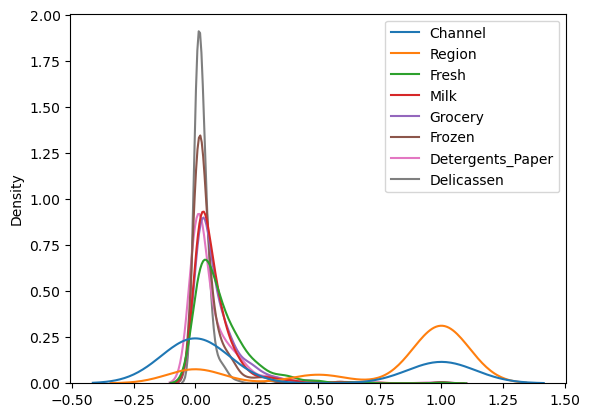

In [26]:
sns.kdeplot(data = min_max_df)
plt.show()

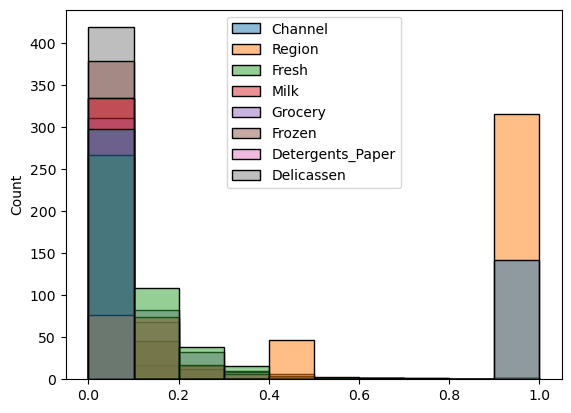

In [27]:
sns.histplot(data = min_max_df, bins = 10)
plt.show()

From the above two graphs looking at the KDEplot we can see that Standard Scaler does a better job compared to MinMax scaler. The KDEplot of the standard scalar has more lines that lies within the same range. Hence we are using Standard Scaler here. 

Standard scaler scales data in a way that zero becomes the mean and 1 becomes the standard deviation. Minmax scaler is mostly used when there is neagative values in the data and we want to shrink the values between 0 and 1.

In [28]:
df = scaled_df

In [29]:
df['Channel'] = df['Channel'].astype('float64')

In [30]:
df.dtypes

Channel             float64
Region              float64
Fresh               float64
Milk                float64
Grocery             float64
Frozen              float64
Detergents_Paper    float64
Delicassen          float64
dtype: object

In [31]:
df['Channel'].value_counts()

-0.690297    298
 1.448652    142
Name: Channel, dtype: int64

In [32]:
X = df.drop(['Channel'], axis = 1)
y = df['Channel']

In [33]:
X.shape

(440, 7)

In [34]:
y.shape

(440,)

In [35]:
y = round(y, 6)
y.value_counts()
y[y==-0.690297] = 0
y[y==1.448652 ] = 1

#### Recursive Feature Elimination


In [36]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
rf = RandomForestClassifier()
rfecv = RFECV(estimator = rf)
rfecv.fit(X, y)

RFECV(estimator=RandomForestClassifier())

In [39]:
rfecv.get_feature_names_out()
#these are the 4 optimal features that the model found. 

array(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'], dtype=object)

In [40]:
rfecv.cv_results_['mean_test_score']

array([0.88181818, 0.9       , 0.91136364, 0.91590909, 0.92045455,
       0.925     , 0.91136364])

In [41]:
print("The number of optimum features that the model found : ",rfecv.n_features_)
print("Name of the optimum features that the model found",rfecv.get_feature_names_out())
print("The mean of Cross Validation scores ",rfecv.cv_results_['mean_test_score'])

The number of optimum features that the model found :  6
Name of the optimum features that the model found ['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicassen']
The mean of Cross Validation scores  [0.88181818 0.9        0.91136364 0.91590909 0.92045455 0.925
 0.91136364]


In [43]:
pd.DataFrame(rfecv.ranking_, index = X.columns, columns = ['Feature Ranking']).sort_values(by=['Feature Ranking'])

,Feature Ranking
Fresh,1
Milk,1
Grocery,1
Frozen,1
Detergents_Paper,1
Delicassen,1
Region,2


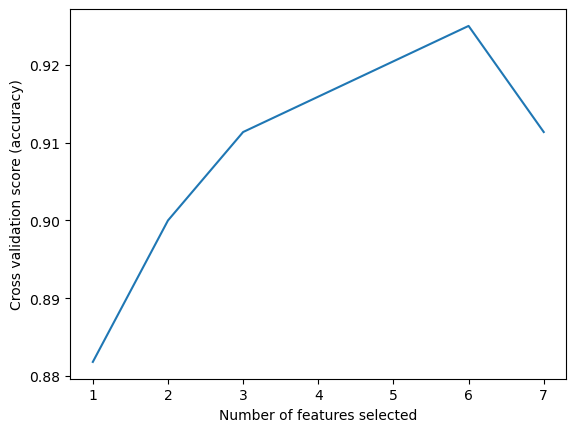

In [44]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(1 ,len(rfecv.cv_results_['mean_test_score']) + 1),
    rfecv.cv_results_['mean_test_score'])
plt.show()

#### K-means Clustering 

Implement KMeans Clustering for K=2 to K=15 and based on elbow method identify what is the
optimum number of clusters

In [45]:
from sklearn.cluster import KMeans

In [46]:
w = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 3)
    kmeans.fit(df)
    w.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
    

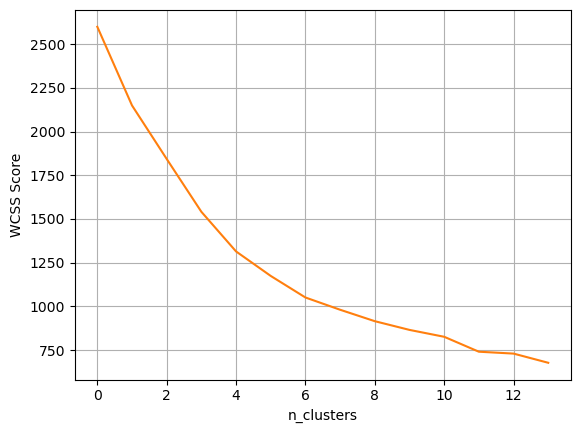

In [52]:
plt.plot(w)
plt.xlabel('n_clusters')
plt.ylabel('WCSS Score')
plt.grid()
plt.show()

As we can see the Slope of the plot line decreases at the point where k = 6. Since its not very clearly visible, we can try an alternate library which gives finds the K using elbow method along with a visualization.

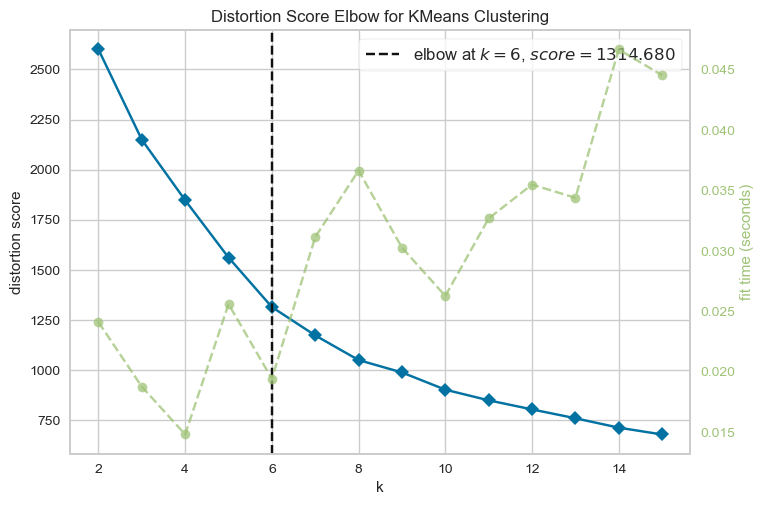

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,16), timings= True)
visualizer.fit(df)        # Fit data to visualizer
visualizer.show() 

Here also we can find that the score is 6 as we already calculated

In [54]:
#fitting Kmeans clustering
kmeans = KMeans(n_clusters=6, random_state = 3)
kmeans_model = kmeans.fit(df)

In [104]:
kmeans_model_comp =kmeans_model.transform(df)

In [74]:
kmeans.labels_

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       1, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 5, 0, 0, 2, 2, 1, 0, 2, 2, 5, 0, 2, 2, 0, 5, 0, 0, 2, 5,
       2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 5, 5, 1,
       2, 2, 2, 2, 5, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       1, 2, 2, 2, 2, 1, 2, 4, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0,
       3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 5, 3, 3, 0, 3, 0, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3,
       0, 3, 0, 3, 0, 3, 3, 3, 3, 1, 2, 2, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 0, 3, 0, 3, 0, 0, 3, 0,

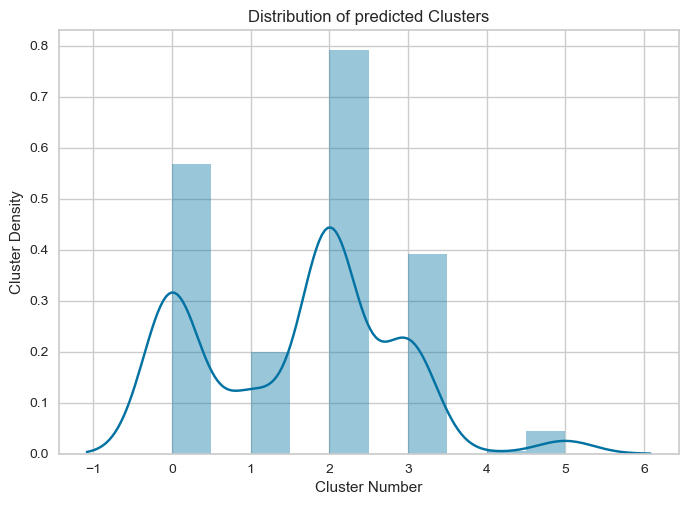

In [72]:
sns.distplot(pd.DataFrame(kmeans.labels_))
plt.xlabel('Cluster Number')
plt.ylabel('Cluster Density')
plt.title("Distribution of predicted Clusters")
plt.show()

In [75]:
from sklearn.decomposition import PCA

In [91]:
pca_2comp = PCA(n_components=2, random_state=3).fit(df)
pca_2d = pca_2comp.transform(df)

In [92]:
print("PCA 2 Explained Variance : ",pca_2comp.explained_variance_)
print("PCA 2 Explained Variance Ratio : ", pca_2comp.explained_variance_ratio_)

PCA 2 Explained Variance :  [3.10707136 1.79404441]
PCA 2 Explained Variance Ratio :  [0.38750123 0.22374588]


In [93]:
pca_4comp = PCA(n_components=4, random_state=3).fit(df)
pca_4d = pca_4comp.transform(df)
print("PCA 4 Explained Variance : ",pca_4comp.explained_variance_)
print("PCA 4 Explained Variance Ratio : ", pca_4comp.explained_variance_ratio_)

PCA 4 Explained Variance :  [3.10707136 1.79404441 1.0140786  0.74007428]
PCA 4 Explained Variance Ratio :  [0.38750123 0.22374588 0.12647173 0.09229904]


#### Visualing the clusters in the Data

In [140]:
kmeans_model_comp.shape

(440, 6)

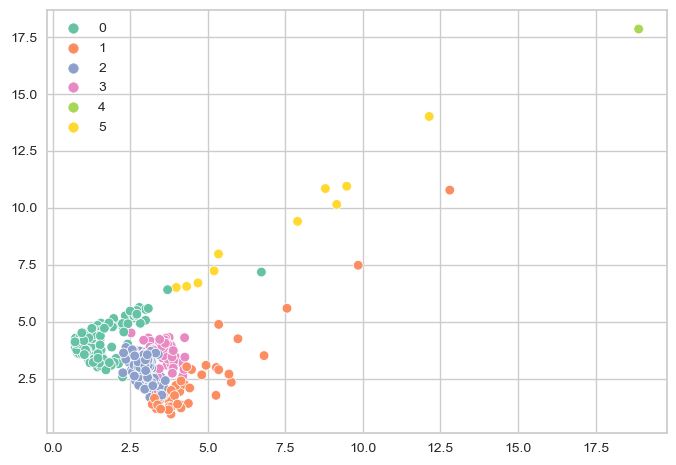

In [110]:
sns.scatterplot(kmeans_model_comp[:,0], kmeans_model_comp[:,1], 
                hue=kmeans_model.labels_, palette='Set2')
plt.show()

In [134]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}
from sklearn.metrics import accuracy_score

In [135]:

kfold = KFold(n_splits=5)
model=XGBClassifier() 

results = cross_validate(estimator=model,
                                          X=X,
                                          y=y,
                                          cv=kfold,
                                          scoring=scoring)

In [138]:
results

{'fit_time': array([0.08197808, 0.04192376, 0.04550505, 0.0387361 , 0.06249189]),
 'score_time': array([0.00858402, 0.0029211 , 0.00286508, 0.00264716, 0.00283384]),
 'test_accuracy': array([0.88636364, 0.93181818, 0.88636364, 0.92045455, 0.93181818]),
 'test_precision': array([0.93333333, 0.95652174, 0.66666667, 0.85294118, 0.78947368]),
 'test_recall': array([0.85714286, 0.81481481, 0.88888889, 0.93548387, 0.88235294])}

In [144]:
print("Accuracy of the model is :",results['test_accuracy'].mean())

Accuracy of the model is : 0.9113636363636364


In [146]:
print("Precision of the model is :",results['test_precision'].mean())

Precision of the model is : 0.8397873199623099


In [145]:
print("Recall of the model is :",results['test_recall'].mean())

Recall of the model is : 0.8757366745981546
